In [82]:
import numpy as np
import pandas as pd
pd.set_option('display.max_rows', None)


In [83]:
# Choose copula by AIC

result_names = ['BBT_Tiingo',
                'BBT_future_Tiingo_ada', 
                'BBT_future_Tiingo_eth',
                'BBT_future_Tiingo_ltc',
                'BBT_future_Tiingo_xrp',
                'BBT_future_BITX',
                'BBT_future_BITW20', 
                'BBT_future_BITW70', 
                'BBT_future_BITW100', 
                'BBT_future_CRIX']

coin_names = ['btc', 'ada', 'eth', 'ltc', 'xrp',
              'BITX', 'BITW20', 'BITW70', 'BITW100', 'CRIX']

result_coin_mapper = dict(zip(result_names, coin_names))

# l = pd.read_json('../../results/BBT_future_Tiingo_ada/MM/likelihood.json') # likelihood 
l = pd.read_json('../../results/BBT_Tiingo/MM/likelihood.json') # likelihood 
l *= 300 # 300 data points
# l = l.iloc[[0,1,3,4,5,6,7]] #remove t copula capped

In [84]:
k = {'Gaussian':1,
     't_Copula':2, 
     't_Copula_Capped':2, 
     'Clayton':1, 
     'Frank':1, # suppress Frank
     'Gumbel':1,  
     'Plackett':1,  
     'Gauss Mix Indep':2}

copula_names = list(k.keys())

def AIC_table(l, drop_t_Copula_Capped=True):
    # l likelihood table
    if drop_t_Copula_Capped:
        l = l.drop(index='t_Copula_Capped')
       
    copula_names = list(l.index)
    AIC = l.copy()
    
    for c in copula_names:
        AIC.loc[c,:] = -2*l.loc[c,:]+2*k[c]
        
    return AIC

In [85]:
AIC_results = dict()
copula_to_use = dict()
copula_count = dict()

for result in result_names:
    l = pd.read_json('../../results/%s/MM/likelihood.json'%result) # likelihood 
    l *=300 # 300 data points
    
    _AIC = AIC_table(l, True)
    AIC_results[result] = _AIC
    
    _copula = _AIC.idxmin(axis='rows')
    _copula = pd.DataFrame(_copula).reset_index()
    _copula.columns = ['file', 'copula']
    copula_to_use[result] = _copula
    

    copula_count[result]= pd.pivot_table(_copula, index=['copula'], aggfunc='count')

In [92]:
copula_count_summary = pd.DataFrame(columns=copula_names)

for rm in result_names:
    c = copula_count[rm]
    c.index.name = None
    c.columns = [result_coin_mapper[rm]]
    copula_count_summary = copula_count_summary.append(c.T)

In [93]:
copula_count_summary = copula_count_summary.fillna(0)


In [95]:
copula_count_summary = pd.concat([copula_count_summary.loc[:,c] for c in copula_names if c != 't_Copula_Capped'],
          axis=1)

In [96]:
copula_count_summary.loc['sum',:] = copula_count_summary.sum()

In [97]:
copula_count_summary = copula_count_summary.astype(np.int)

copula_count_summary

/Users/francis/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  """Entry point for launching an IPython kernel.


,Gaussian,t_Copula,Clayton,Frank,Gumbel,Plackett,Gauss Mix Indep
btc,0,105,0,0,0,1,6
ada,3,77,12,0,0,0,15
eth,3,56,1,0,0,18,34
ltc,0,82,6,0,0,0,24
xrp,1,25,47,0,0,37,2
BITX,0,57,0,0,0,0,24
BITW20,0,60,2,0,0,1,18
BITW70,0,47,34,0,0,0,0
BITW100,0,61,0,0,0,0,20
CRIX,0,65,0,0,1,2,20


In [98]:
_index = ['btc','eth','ada','ltc','xrp','BITX','CRIX','BITW100','BITW20','BITW70']
copula_count_summary.reindex(_index)

,Gaussian,t_Copula,Clayton,Frank,Gumbel,Plackett,Gauss Mix Indep
btc,0,105,0,0,0,1,6
eth,3,56,1,0,0,18,34
ada,3,77,12,0,0,0,15
ltc,0,82,6,0,0,0,24
xrp,1,25,47,0,0,37,2
BITX,0,57,0,0,0,0,24
CRIX,0,65,0,0,1,2,20
BITW100,0,61,0,0,0,0,20
BITW20,0,60,2,0,0,1,18
BITW70,0,47,34,0,0,0,0


'2020-12-11 21:00:00+00:00'

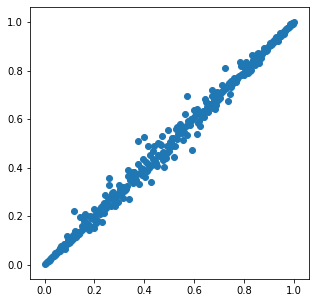

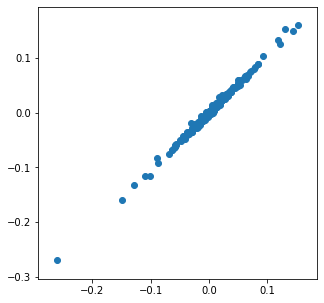

In [99]:
df = pd.read_csv('../../processed_data/BBT_Tiingo/train/22.csv')

rs = df.loc[:,'log return bitcoin']
rf = df.loc[:,'log return future']

import matplotlib.pyplot as plt
import os, sys
sys.path.append('../../src/')
import toolbox
import KDEs as K

kde_rs = K.KDE(rs, 'Gaussian')
kde_rf = K.KDE(rf, 'Gaussian')

u = kde_rs.cdf(rs)
v = kde_rf.cdf(rf)
plt.figure(figsize=(5,5))
plt.scatter(u, v)

plt.figure(figsize=(5,5))
plt.scatter(rs, rf)
df.Date.iloc[0]

In [100]:
copula_to_use[result_names[0]]

,file,copula
0,97.csv,t_Copula
1,83.csv,t_Copula
2,68.csv,t_Copula
3,6.csv,t_Copula
4,54.csv,t_Copula
5,40.csv,Gauss Mix Indep
6,41.csv,t_Copula
7,7.csv,t_Copula
8,55.csv,t_Copula
9,69.csv,t_Copula


In [101]:
OHR = pd.read_csv('../../results/%s/MM/OHR.csv'%result_names[0])

In [102]:
risk_measures = list(np.unique(OHR.loc[:, 'risk measure']))

In [103]:
for rn in result_names:
    for rm in risk_measures:
        ctu = copula_to_use[rn]
        rh_df = pd.DataFrame()

        for i in range(len(ctu)):
            file = ctu.file[i]
            c = ctu.copula[i]

            _id = (OHR.file==file) & (OHR.copula==c) & (OHR.loc[:,'risk measure']==rm)
            h = OHR.loc[_id,'OHR'].values[0]

            # Load testing data
            test_df = pd.read_csv('../../processed_data/%s/test/%s'%(rn, file))

            Date = test_df.Date
            rs = test_df.iloc[:,-1]
            rf = test_df.iloc[:,-2]
            rh = rs - h*rf

            rh = pd.DataFrame({'Date':Date, 'rh':rh, 'rs':rs, 'rf':rf, 'h':h, 'copula':c})
            rh_df = rh_df.append(rh)

        rh_df.Date = pd.to_datetime(rh_df.Date)
        rh_df.sort_values('Date', ascending=False, inplace=True)
        rh_df.to_csv('../../results/%s/MM/rh_%s_copula_selection.csv'%(rn, rm))

/Users/francis/opt/anaconda3/lib/python3.7/site-packages/matplotlib/cbook/__init__.py:1402: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  x[:, None]
/Users/francis/opt/anaconda3/lib/python3.7/site-packages/matplotlib/axes/_base.py:276: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  x = x[:, np.newaxis]
/Users/francis/opt/anaconda3/lib/python3.7/site-packages/matplotlib/axes/_base.py:278: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  y = y[:, np.newaxis]


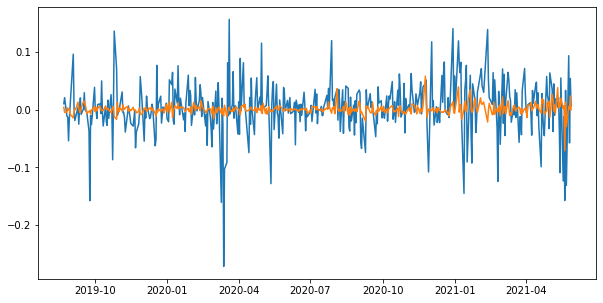

In [104]:
plt.figure(figsize=(10,5))
plt.plot(rh_df.Date, rh_df.rs)
plt.plot(rh_df.Date, rh_df.rh)

In [105]:
rh_df

,Date,rh,rs,rf,h,copula
0,2021-05-27 20:00:00+00:00,-5.869838e-04,0.005573,0.006583,0.935742,t_Copula
1,2021-05-26 20:00:00+00:00,2.346679e-02,0.054012,0.032643,0.935742,t_Copula
2,2021-05-25 20:00:00+00:00,6.191337e-04,-0.057626,-0.062245,0.935742,t_Copula
3,2021-05-24 20:00:00+00:00,5.002155e-03,0.093271,0.094330,0.935742,t_Copula
4,2021-05-21 20:00:00+00:00,-2.935953e-02,-0.131176,-0.108809,0.935742,t_Copula
0,2021-05-20 20:00:00+00:00,1.305516e-02,0.033315,0.021291,0.951562,Gauss Mix Indep
1,2021-05-19 20:00:00+00:00,-7.121014e-02,-0.157294,-0.090465,0.951562,Gauss Mix Indep
2,2021-05-18 20:00:00+00:00,6.672540e-03,-0.012067,-0.019694,0.951562,Gauss Mix Indep
3,2021-05-17 20:00:00+00:00,1.734805e-03,-0.123533,-0.131645,0.951562,Gauss Mix Indep
4,2021-05-14 20:00:00+00:00,1.969524e-02,0.054760,0.036850,0.951562,Gauss Mix Indep


In [106]:
name = 'BBT_future_Tiingo_xrp'
copula_to_use[name]

train = pd.read_csv('../../processed_data/%s/train/%s'%(name, '0.csv'))

train.head()

,Unnamed: 0,Date,PX_LAST,contract_name,xrp Price,log return future,log return xrp
0,5,2021-05-20 20:00:00+00:00,40350.0,BTCM1 Curncy,1.182123,0.021291,0.014197
1,6,2021-05-19 20:00:00+00:00,39500.0,BTCM1 Curncy,1.165459,-0.090465,-0.304108
2,7,2021-05-18 20:00:00+00:00,43240.0,BTCM1 Curncy,1.579682,-0.019694,0.031345
3,8,2021-05-17 20:00:00+00:00,44100.0,BTCM1 Curncy,1.530934,-0.131645,0.102715
4,9,2021-05-14 20:00:00+00:00,50305.0,BTCM1 Curncy,1.381491,0.036850,0.093586


In [107]:
name = 'BBT_future_BITW70'
ctu = copula_to_use[name]
ctu.head()

,file,copula
0,68.csv,t_Copula
1,6.csv,Clayton
2,54.csv,t_Copula
3,40.csv,t_Copula
4,41.csv,t_Copula


In [108]:
training_Clayton = pd.DataFrame()
training = pd.DataFrame()
for i in range(len(ctu)):
    row = ctu.iloc[i, :]
    file = row.file
    df = pd.read_csv('../../processed_data/%s/train/%s'%(name, file))
    training = training.append(df)
    if row.copula == 'Clayton':
        training_Clayton = training_Clayton.append(df)
        
training_Clayton = training_Clayton.drop_duplicates('Date')
training_Clayton.Date = pd.to_datetime(training_Clayton.Date)
training_Clayton.sort_values('Date', inplace=True)

training = training.drop_duplicates('Date')
training.Date = pd.to_datetime(training.Date)
training.sort_values('Date', inplace=True)

In [109]:
training

,Unnamed: 0,Date,PX_LAST,contract_name,BITW70 Price,% Change,log return future,log return BITW70
299,704,2018-08-13 20:00:00+00:00,6230.0,BTCU18 Curncy,11239.92,-11.96%,-0.026140,-0.193346
298,703,2018-08-14 20:00:00+00:00,6075.0,BTCU18 Curncy,11130.42,-0.97%,-0.025194,-0.009790
297,702,2018-08-15 20:00:00+00:00,6370.0,BTCU18 Curncy,10585.10,-4.90%,0.047417,-0.050235
296,701,2018-08-16 20:00:00+00:00,6410.0,BTCU18 Curncy,10898.22,2.96%,0.006260,0.029152
295,700,2018-08-17 20:00:00+00:00,6480.0,BTCU18 Curncy,12275.32,12.64%,0.010861,0.118991
294,699,2018-08-20 20:00:00+00:00,6430.0,BTCU18 Curncy,11689.72,-1.13%,-0.007746,-0.048881
293,698,2018-08-21 20:00:00+00:00,6420.0,BTCU18 Curncy,13634.07,16.63%,-0.001556,0.153862
292,697,2018-08-22 20:00:00+00:00,6405.0,BTCU18 Curncy,11175.38,-18.03%,-0.002339,-0.198859
291,696,2018-08-23 20:00:00+00:00,6395.0,BTCU18 Curncy,11436.00,2.33%,-0.001563,0.023053
290,695,2018-08-24 20:00:00+00:00,6595.0,BTCU18 Curncy,11909.17,4.14%,0.030795,0.040542


/Users/francis/opt/anaconda3/lib/python3.7/site-packages/matplotlib/cbook/__init__.py:1402: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  x[:, None]
/Users/francis/opt/anaconda3/lib/python3.7/site-packages/matplotlib/axes/_base.py:276: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  x = x[:, np.newaxis]
/Users/francis/opt/anaconda3/lib/python3.7/site-packages/matplotlib/axes/_base.py:278: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  y = y[:, np.newaxis]


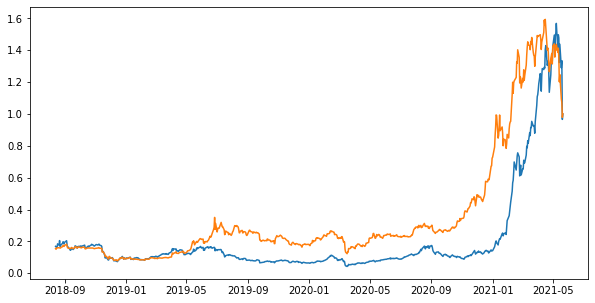

In [110]:
future = training.loc[:,'PX_LAST']
spot = training.loc[:,'BITW70 Price']
date = training.Date

plt.figure(figsize=(10,5))
plt.plot(date, spot/spot.iloc[-1])
plt.plot(date, future/future.iloc[-1])

# plt.plot(training_Clayton.Date, training_Clayton.loc[:, 'xrp Price']/xrp.iloc[-1])
# plt.plot(date, future/future.iloc[-1])

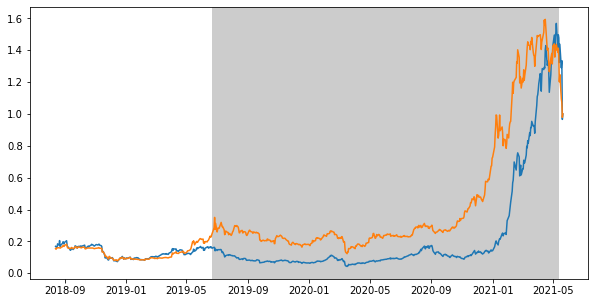

In [111]:
plt.figure(figsize=(10,5))
plt.plot(date, spot/spot.iloc[-1])
plt.plot(date, future/future.iloc[-1])

for i in range(len(training_Clayton)-1):
    start = training_Clayton.Date.iloc[i]
    end =  training_Clayton.Date.iloc[i+1]
    plt.axvspan(start, end,facecolor='black', alpha=.2)

In [117]:
rs

299   -0.037824
298   -0.016936
297    0.028718
296    0.006925
295   -0.007677
294   -0.137135
293    0.065541
292   -0.052788
291    0.023810
290    0.015024
289   -0.005742
288    0.010723
287   -0.007799
286   -0.061995
285   -0.068653
284    0.037131
283   -0.151488
282   -0.124148
281    0.030574
280    0.046895
279    0.009626
278    0.026677
277   -0.002988
276   -0.021801
275    0.032060
274    0.013161
273   -0.048964
272   -0.000090
271   -0.000059
270   -0.022281
269   -0.000297
268    0.003149
267   -0.041773
266   -0.024541
265   -0.023296
264   -0.039415
263    0.019916
262   -0.033779
261   -0.082080
260   -0.001380
259    0.000362
258    0.035625
257   -0.015018
256   -0.033477
255    0.043110
254    0.037673
253   -0.005666
252   -0.020053
251   -0.089462
250   -0.026997
249    0.009670
248    0.012400
247   -0.005588
246   -0.016575
245   -0.022825
244    0.027498
243   -0.024689
242   -0.014420
241    0.004842
240   -0.012330
239    0.003166
238    0.041458
237    0

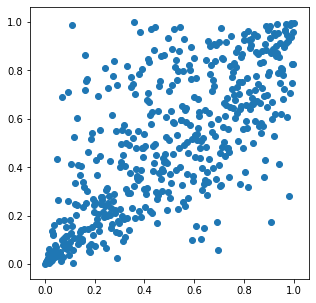

In [118]:
# rs = train.loc[:,'log return xrp']
# rf = train.loc[:,'log return future']
rs = np.array(training_Clayton.iloc[:, -1])
rf = np.array(training_Clayton.iloc[:, -2])

kde_rs = K.KDE(rs, 'Gaussian')
kde_rf = K.KDE(rf, 'Gaussian')

u = kde_rs.cdf(rs)
v = kde_rf.cdf(rf)

plt.figure(figsize=(5,5))
plt.scatter(u,v)